In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Social_Network_Ads.csv') # logistic regression only for binary classification

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


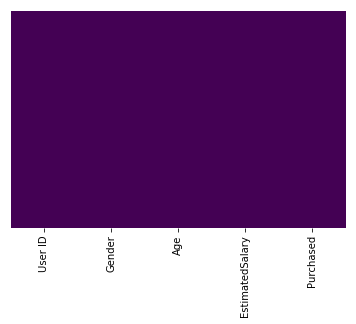

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')   # no null values

In [5]:
# user id is not important
df1=df.drop('User ID',axis=1)
df1
# pre-process data

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
5,Male,27,58000,0
6,Female,27,84000,0
7,Female,32,150000,1
8,Male,25,33000,0
9,Female,35,65000,0


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
lb=LabelEncoder()
df1.iloc[:,0]=lb.fit_transform(df1.iloc[:,0])

In [8]:
from scipy import stats
z=np.abs(stats.zscore(df1))
z

array([[1.02020406, 1.78179743, 1.49004624, 0.74593581],
       [1.02020406, 0.25358736, 1.46068138, 0.74593581],
       [0.98019606, 1.11320552, 0.78528968, 0.74593581],
       ...,
       [0.98019606, 1.17910958, 1.46068138, 1.34059793],
       [1.02020406, 0.15807423, 1.07893824, 0.74593581],
       [0.98019606, 1.08359645, 0.99084367, 1.34059793]])

In [9]:
# removing z-score value greater than threshold i.e 3
# no outliers..so no need to remove

In [10]:
#plt.figure(figsize=(12, 7))
#sns.boxplot(x='Purchased',y='A',data=df,palette='winter')

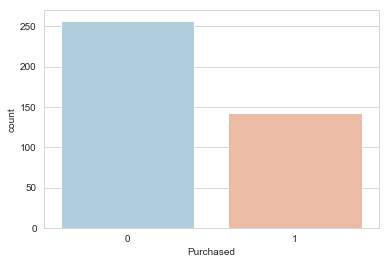

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Purchased',data=df,palette='RdBu_r')

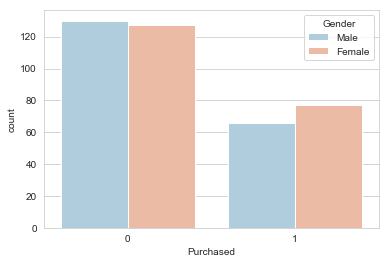

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Purchased',hue='Gender',data=df,palette='RdBu_r')

In [13]:
y=df1.iloc[:,-1].values
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [14]:
# feature scaling
# if have large varitions in independent variables like some small counts and other have all big big counts..do sacling so, asall variables counts will be in 0 &1df1
# like here one has 19 value other has high 19000 value
df1

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
5,1,27,58000,0
6,0,27,84000,0
7,0,32,150000,1
8,1,25,33000,0
9,0,35,65000,0


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop('Purchased',axis=1), 
                                                    df1['Purchased'], test_size=0.30, random_state=0)

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train= sc.fit_transform(X_train)
X_test=sc.transform(X_test)

C:\python\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\python\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\python\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [19]:
X_train

array([[ 0.99288247, -1.1631724 , -1.5849703 ],
       [ 0.99288247,  2.17018137,  0.93098672],
       [-1.00716855,  0.0133054 ,  1.22017719],
       [ 0.99288247,  0.20938504,  1.07558195],
       [-1.00716855,  0.40546467, -0.48604654],
       [ 0.99288247, -0.28081405, -0.31253226],
       [ 0.99288247,  0.99370357, -0.8330751 ],
       [-1.00716855,  0.99370357,  1.8563962 ],
       [-1.00716855,  0.0133054 ,  1.24909623],
       [ 0.99288247, -0.86905295,  2.26126285],
       [-1.00716855, -1.1631724 , -1.5849703 ],
       [ 0.99288247,  2.17018137, -0.80415605],
       [ 0.99288247, -1.35925203, -1.46929411],
       [ 0.99288247,  0.40546467,  2.2901819 ],
       [-1.00716855,  0.79762394,  0.75747245],
       [ 0.99288247, -0.96709276, -0.31253226],
       [ 0.99288247,  0.11134522,  0.75747245],
       [ 0.99288247, -0.96709276,  0.55503912],
       [ 0.99288247,  0.30742485,  0.06341534],
       [ 0.99288247,  0.69958412, -1.26686079],
       [-1.00716855, -0.47689368, -0.023

In [21]:
from sklearn.naive_bayes import GaussianNB

In [22]:
nv = GaussianNB()

In [23]:
nv.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [24]:
y_pred=nv.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9083333333333333

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print(confusion_matrix(y_test,y_pred))

[[76  3]
 [ 8 33]]


In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        79
           1       0.92      0.80      0.86        41

   micro avg       0.91      0.91      0.91       120
   macro avg       0.91      0.88      0.89       120
weighted avg       0.91      0.91      0.91       120

